# Model 800 basicRt

Charlie Shobe

Here, I'm testing simple stream power with rock/till. I'll do this by splitting the domain into two halves with different K's.

This model has stream power and linear diffusion of the forms:
$$\frac{d\eta}{dt}=-KA^mS^n$$
and
$$\frac{d\eta}{dt} = -D\nabla^2\eta$$

So, at steady state, the landscape will obey:
$$S=\left(\frac{U}{KA^m}\right)^{1/n}$$
when only the fluvial rule is in place ($D=0$) and:
$$\eta = -\frac{U}{D}\frac{x^2}{2}+\frac{U}{D}\frac{L^2}{2}$$
when only the hillslope rules are in place ($K=0$).

In [1]:
from terrainbento import BasicRt
import numpy as np
import matplotlib.pyplot as plt
from landlab import imshow_grid

//anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [2]:
#parameter dictionary
params = { 'number_of_node_rows' : 100,
          'number_of_node_columns' : 160,
          'node_spacing' : 10.0,
          'east_boundary_closed' : False,
          'north_boundary_closed' : False,
          'west_boundary_closed' : False,
          'south_boundary_closed' : False,
          'dt' : 10.0,
          'K_rock_sp' : 0.001,
          'K_till_sp' : 0.01,
          'm_sp' : 0.5,
          'n_sp' : 1.0,
          'linear_diffusivity' : 10e-20,
          'outlet_lowering_rate' : 0.0005,
          'output_filename' : 'model_000_output',
          'rock_till_file__name' : 'ss_test_rock_till.txt',
          'contact_zone__width' : 1.0
}

In [3]:
#instantiate and establish topo error tolerance
rt = BasicRt(params=params)
tolerance = 0.0001

In [4]:
#time loop
dt = 10.
elapsed_time = 0 #years
keep_running = True
while keep_running == True:
    pre_topo = rt.grid.at_node['topographic__elevation'][rt.grid.core_nodes]
    rt.run_one_step(dt)
    post_topo = rt.grid.at_node['topographic__elevation'][rt.grid.core_nodes]
    if elapsed_time % 1000 == 0:
        print(elapsed_time)
        print('MAX: ', max(abs(pre_topo - post_topo)))
        print('MEAN: ', np.average(abs(pre_topo - post_topo)))
    elapsed_time += dt
    if max(abs(pre_topo - post_topo)) <= tolerance: #1mm
        keep_running = False

0
MAX:  0.274500160927
MEAN:  0.016817008887
1000.0
MAX:  0.0116461298707
MEAN:  0.00155079850967
2000.0
MAX:  0.00746919738464
MEAN:  0.00138021373141
3000.0
MAX:  0.0102565145416
MEAN:  0.000991382753363
4000.0
MAX:  0.00561883656732
MEAN:  0.000603965609503
5000.0
MAX:  0.0129849832205
MEAN:  0.000365653378584
6000.0
MAX:  0.0061756436459
MEAN:  0.000239437041735
7000.0
MAX:  0.00897898117371
MEAN:  0.000182450020855
8000.0
MAX:  0.00683695488629
MEAN:  0.000154888992786
9000.0
MAX:  0.00682123815681
MEAN:  0.000131276189176
10000.0
MAX:  0.00563871007512
MEAN:  0.000117251916048
11000.0
MAX:  0.00486902573351
MEAN:  0.000105484708825
12000.0
MAX:  0.0066049590787
MEAN:  9.99007279458e-05
13000.0
MAX:  0.00928579257497
MEAN:  9.53924423825e-05
14000.0
MAX:  0.00606603885956
MEAN:  9.39585624527e-05
15000.0
MAX:  0.00577424126913
MEAN:  9.33432481044e-05
16000.0
MAX:  0.00508091760726
MEAN:  9.51647638436e-05
17000.0
MAX:  0.0060666179787
MEAN:  9.13515162031e-05
18000.0
MAX:  0.0061

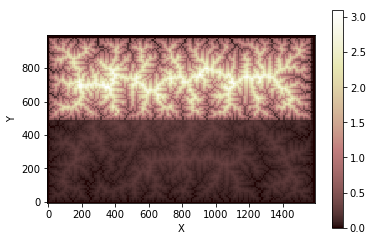

In [5]:
%matplotlib inline
imshow_grid(rt.grid, 'topographic__elevation')

0.00550019336541


(1e-05, 1.0)

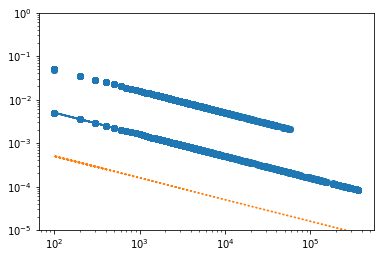

In [6]:
print(rt.grid.at_node['topographic__steepest_slope'][235])
#for some reason, the line of nodes adjacent to all the boundaries need to be cut
plt.scatter(rt.grid.at_node['drainage_area'][(rt.grid.node_x > 20)&(rt.grid.node_x < 1580)&(rt.grid.node_y >20)&(rt.grid.node_y<980)], rt.grid.at_node['topographic__steepest_slope'][(rt.grid.node_x > 20)&(rt.grid.node_x < 1580)&(rt.grid.node_y >20)&(rt.grid.node_y<980)])
plt.plot(rt.grid.at_node['drainage_area'][(rt.grid.node_x > 20)&(rt.grid.node_x < 1580)&(rt.grid.node_y >20)&(rt.grid.node_y<980)], (0.00005 / 0.001)*np.power(rt.grid.at_node['drainage_area'][(rt.grid.node_x > 20)&(rt.grid.node_x < 1580)&(rt.grid.node_y >20)&(rt.grid.node_y<980)], -0.5))
plt.plot(rt.grid.at_node['drainage_area'][(rt.grid.node_x > 20)&(rt.grid.node_x < 1580)&(rt.grid.node_y >20)&(rt.grid.node_y<980)], (0.00005 / 0.01)*np.power(rt.grid.at_node['drainage_area'][(rt.grid.node_x > 20)&(rt.grid.node_x < 1580)&(rt.grid.node_y >20)&(rt.grid.node_y<980)], -0.5), linestyle=':')
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.00001, 1.0)

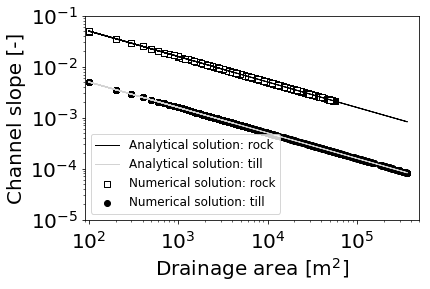

In [31]:
###MAKE SLOPE-AREA PLOT

import matplotlib

#assign area_array and slope_array for ROCK
area_array_rock = rt.grid.at_node['drainage_area'][(rt.grid.node_x > 10)&(rt.grid.node_x < 1580)&(rt.grid.node_y >=500)&(rt.grid.node_y<980)]
slope_array_rock = rt.grid.at_node['topographic__steepest_slope'][(rt.grid.node_x > 10)&(rt.grid.node_x < 1580)&(rt.grid.node_y >=500)&(rt.grid.node_y<980)]

#assign area_array and slope_array for TILL
area_array_till = rt.grid.at_node['drainage_area'][(rt.grid.node_x > 10)&(rt.grid.node_x < 1580)&(rt.grid.node_y >10)&(rt.grid.node_y<500)]
slope_array_till = rt.grid.at_node['topographic__steepest_slope'][(rt.grid.node_x > 10)&(rt.grid.node_x < 1580)&(rt.grid.node_y >10)&(rt.grid.node_y<500)]

#plotting param
matplotlib.rcParams.update({'font.size': 20})

##instantiate figure and plot
fig = plt.figure(figsize=(6, 3.75))
slope_area = plt.subplot()

#create an array for the detachment-limited analytical solution
u = 0.0005 #m/yr, uplift or baselevel lowering rate
k_rock = 0.001 #fluvial erodibility for rock
k_till = 0.01
m = 0.5 #discharge exponent
n = 1.0 #slope exponent

#calculate analytical slope from area field for ROCK
analytical_slope_array = np.power((u / k_rock), 1 / n) * np.power(area_array, -m/n)

#plot the analytical solution for ROCK
slope_area.plot(area_array, analytical_slope_array, linestyle='-',
                color='k', linewidth = 1, label = 'Analytical solution: rock')

#plot the data for ROCK
slope_area.scatter(area_array_rock, slope_array_rock, marker='s', edgecolor='0', color='1', 
                   label = 'Numerical solution: rock') #plot HA data
#####################################################################
#calculate analytical slope from area field for TILL
analytical_slope_array = np.power((u / k_till), 1 / n) * np.power(area_array, -m/n)

#plot the analytical solution for TILL
slope_area.plot(area_array, analytical_slope_array, linestyle='-',
                color='lightgrey', linewidth = 1, label = 'Analytical solution: till')

#plot the data for TILL
slope_area.scatter(area_array_till, slope_array_till, color='k', 
                   label = 'Numerical solution: till') #plot HA data

#make axes log and set limits
slope_area.set_xscale('log')
slope_area.set_yscale('log')

slope_area.set_xlim(9*10**1, 5*10**5)
slope_area.set_ylim(1e-5, 1e-1)

#set x and y labels
slope_area.set_xlabel(r'Drainage area [m$^2$]')
slope_area.set_ylabel('Channel slope [-]')
slope_area.legend(scatterpoints=1,prop={'size':12})
slope_area.tick_params(axis='x', which='major', pad=7)

fig.savefig('rock_till_slope_area.eps',bbox_inches='tight', dpi=1000) #save figure

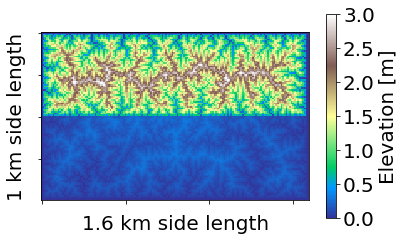

In [30]:
##MAKE TOPO FIGURE
#define 'topo'
topo = rt.grid.at_node['topographic__elevation']
#plotting param
matplotlib.rcParams.update({'font.size': 20})

# #instantiate figure and plot
topo_fig = plt.figure(figsize=(6, 3.75))
t1 = plt.subplot()
topo = topo.reshape(100,160)
ts1_plot = t1.imshow(topo[::-1], cmap='terrain', vmin = 0, vmax = 3.0)

#add colorbar
cb = plt.colorbar(ts1_plot, label = 'Elevation [m]')

#axis labels
t1.tick_params(labelbottom='off', labelleft='off') 
t1.set_ylabel('1 km side length', labelpad = 15)
t1.set_xlabel('1.6 km side length', labelpad = 15)

#save figure
topo_fig.savefig('rock_till_topo.eps',bbox_inches='tight', dpi=300)